In [157]:
#### I would request you to please go through the code before running all cells!

### Importing necessary libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import requests
import re
import discogs_client
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.stats as stats
from io import StringIO
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px

#### Importing the file hosted on google drive
Or read it directly with the file downloaded in the same folder as the code

Link to source of file-
https://data.mendeley.com/datasets/3t9vbwxgr5/2

In [15]:
#df=pd.read_csv('tcc_ceds_music.csv') 
try:
    orig_url = "https://drive.google.com/file/d/1ZOg8IbCfATVjFpypQFm2db9PZdGaKvMo/view?usp=drive_link"
    #this is to remove all the directory information and only extract the alpha numerical file identifier of the code
    file_id = orig_url.split('/')[-2]
    #this is to add the "export syntax to the alpha numierical file_id
    dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
    #turn this object into a raw string
    url = requests.get(dwn_url).text
    csv_raw = StringIO(url)
    #use panda to load the raw csv string
    df= pd.read_csv(csv_raw)
except e:
    print(e)

In [17]:
df.shape

(28372, 31)

In [19]:
df.head()

Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadness  feelings  danceability  loudness  acousticness  \
0    0.000598  ...  0.380299  0.117175      0.357739  0.454119      0.997992   
1    0.443435  ...  0.001284  0.001284      0.331745  0.647540      0.954819   
2    0.002770  ...  0.002770  0.225422      0.456298  0.585288      0.840361   
3    0.001548  ...  0.225889  0.001548      0.686992  0.744404      0.083935   
4    0.417772  ...  0.068800  0.001350      0.291671  0.646489      0.975904   

   instrumentalness   valence    energy       topic  age  
0          0.901822  0.339448  0.137110     sadness  1.0  
1          0.000002  0.325021  0.263240  world/life  1.0  
2          0.000000  0.351814  0.139112       music  1.0  
3          0.199393  0.775350  0.743736    romantic  1.0  
4          0.000246  0.597073  0.394375    romantic  1.0  

[5 rows x 31 columns]

In [21]:
df = df.drop(columns=['Unnamed: 0'])#dropping column unnamed:0 

The column unnamed:0 only has numerical values in ascending order which indicates it could be index but there are irregularities and we dont really need index.

In [24]:
df.head()

artist_name            track_name  release_date genre  \
0                mukesh  mohabbat bhi jhoothi          1950   pop   
1         frankie laine             i believe          1950   pop   
2           johnnie ray                   cry          1950   pop   
3           pérez prado              patricia          1950   pop   
4  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  night/time  ...   sadness  feelings  danceability  loudness  \
0    0.000598    0.000598  ...  0.380299  0.117175      0.357739  0.454119   
1    0.443435    0.001284  ...  0.001284  0.001284      0.331745  0.647540   
2    0.002770    0.002770  ...  0.002770  0.225422      0.456298  0.585288   
3    0.001548    0.001548  ...  0.225889  0.001548      0.686992  0.744404   
4    0.417772    0.001350  ...  0.068800  0.001350      0.291671  0.646489   

   acousticness  instrumentalness   valence    energy       topic  age  
0      0.997992          0.901822  0.339448  0.137110     sadness  1.0  
1      0.954819          0.000002  0.325021  0.263240  world/life  1.0  
2      0.840361          0.000000  0.351814  0.139112       music  1.0  
3      0.083935          0.199393  0.775350  0.743736    romantic  1.0  
4      0.975904          0.000246  0.597073  0.394375    romantic  1.0  

[5 rows x 30 columns]

In [26]:
df.describe()

release_date           len        dating      violence    world/life  \
count  28372.000000  28372.000000  28372.000000  28372.000000  28372.000000   
mean    1990.236888     73.028444      0.021112      0.118396      0.120973   
std       18.487463     41.829831      0.052370      0.178684      0.172200   
min     1950.000000      1.000000      0.000291      0.000284      0.000291   
25%     1975.000000     42.000000      0.000923      0.001120      0.001170   
50%     1991.000000     63.000000      0.001462      0.002506      0.006579   
75%     2007.000000     93.000000      0.004049      0.192608      0.197793   
max     2019.000000    199.000000      0.647706      0.981781      0.962105   

         night/time  shake the audience  family/gospel      romantic  \
count  28372.000000        28372.000000   28372.000000  28372.000000   
mean       0.057387            0.017422       0.017045      0.048681   
std        0.111923            0.040670       0.041966      0.106095   
min        0.000289            0.000284       0.000289      0.000284   
25%        0.001032            0.000993       0.000923      0.000975   
50%        0.001949            0.001595       0.001504      0.001754   
75%        0.065842            0.010002       0.004785      0.042301   
max        0.973684            0.497463       0.545303      0.940789   

       communication  ...    like/girls       sadness      feelings  \
count   28372.000000  ...  28372.000000  28372.000000  28372.000000   
mean        0.076680  ...      0.028057      0.129389      0.030996   
std         0.109538  ...      0.058473      0.181143      0.071652   
min         0.000291  ...      0.000284      0.000284      0.000289   
25%         0.001144  ...      0.000975      0.001144      0.000993   
50%         0.002632  ...      0.001595      0.005263      0.001754   
75%         0.132136  ...      0.026622      0.235113      0.032622   
max         0.645829  ...      0.594459      0.981424      0.958810   

       danceability      loudness  acousticness  instrumentalness  \
count  28372.000000  28372.000000  2.837200e+04      28372.000000   
mean       0.533348      0.665249  3.392347e-01          0.080049   
std        0.173218      0.108434  3.267143e-01          0.211245   
min        0.005415      0.000000  2.811248e-07          0.000000   
25%        0.412975      0.595364  3.423598e-02          0.000000   
50%        0.538612      0.679050  2.259028e-01          0.000085   
75%        0.656666      0.749026  6.325298e-01          0.009335   
max        0.993502      1.000000  1.000000e+00          0.996964   

            valence        energy           age  
count  28372.000000  28372.000000  28372.000000  
mean       0.532864      0.569875      0.425187  
std        0.250972      0.244385      0.264107  
min        0.000000      0.000000      0.014286  
25%        0.329143      0.380361      0.185714  
50%        0.539365      0.580567      0.414286  
75%        0.738252      0.772766      0.642857  
max        1.000000      1.000000      1.000000  

[8 rows x 25 columns]

#### As stated in Project 1 the length of all songs are mostly inaccurate. I will be using scraping to get the accurate length of all songs

It took me 19261.942608356476 seconds or roughly around 5 hours to complete it with only scraping. I was trying to use scraping along with Discog API, to act as a failsafe in case scraping does not give us accurate length. With Discog API it took me more than 3 days of running the code and it still wasnt able to complete all rows so I have decided to just use scraping with rate limiting. 

In [34]:
client = discogs_client.Client('data601', user_token='TngRIvNxVMfvolQbrHdMQjvAyhbuaDTWEuuNauwq')
pattern = re.compile(r'\b(\d{1,2}:\d{2})\b')## looking for patterns such as 01:31 or 9:12
def getLength(artist, track, oldLen):
    
    """
    The functions accepts 3 parameters, artist name, track name and the length of track in the dataset.
    
    Using web scraping, the function searches for <artist name> <track name> length
    
    If it gets a response it will try to find a string in the parsed html content with the pattern- (optionaldigit digit) : digit digit
    
    On a successful match it will return the first occurence of such pattern and split it into MM and SS, ie, minutes and seconds and convert it into seconds

    If no match is not found, an exception occurs, or if the web scraping fails it will return the original length

    Parameter-
    1. artist=name of the artist
    2. track=name of the track
    3. oldLen= lenght of the song in the dataframe

    Returns-
    1. oldLen= If there is an exception or if the match is not found, return the length as it was in the dataframe
    2. (minutes * 60 + seconds)= if length is found, it is in the format of 03:11 or 3:11, return the time in seconds
    """
    
    query = f"{artist} {track} length"
    url = f"https://www.google.com/search?q={query}"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            return response.status_code
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')

        # Search for the duration using regex pattern
        match = pattern.search(soup.get_text())
        if match:
            duration = match.group(1)
            minutes, seconds = map(int, duration.split(':'))
            return minutes * 60 + seconds
        return oldLen
    except Exception as e:
        return oldLen

#Discogs API if web scraping fails
#def getLengthAPI(artist, track):
#    """
#    The function takes input of artist name and track name along with length of song in the dataset
#    
#    Using discog api, the function passes the track name and artist name
#    
#    It returns an object which we iterate through to get the track duration, split it into MM and SS, ie, minutes and seconds and convert it into seconds
#
#    If an exception occurs then it will return the length of the song as it was in the dataset
#    """
#    try:
#        results = client.search(track, type='release', artist=artist)
#        for release in results:
#            for t in release.tracklist:
#                if t.title.lower() == track.lower():
#                    duration_str = t.duration
#                    if duration_str:
#                        minutes, seconds = map(int, duration_str.split(':'))
#                        return minutes * 60 + seconds
#        return oldLen
#    except Exception as e:
#        return oldLen


def updateTracks(df):
    """
    The function takes a dataframe as an input

    To calculate the exact length of song the function has two options, first web scraping and via Discog API

    If scraping returns the same length or if scraping returns non sensical values, discog api will be called

    It also calculates the time taken to get the length of all songs

    Parameters-
    1. df= Takes the input as a dataframe

    Returns-
    1. df= Returns a df with the updated length of songs
    """
    start = time.time()
    for i, row in df.iterrows():
        oldLen = row['len']
        
        scrapingLen = getLength(artist=row['artist_name'], track=row['track_name'], oldLen=oldLen)
        
        # If web scraping fails, call the Discogs API
        #if (scrapingLen == oldLen) or (scrapingLen>500 or scrapingLen<40) :
            #apiLen = getLengthAPI(artist=row['artist_name'], track=row['track_name'], oldLen=oldLen)
            #df.at[i, 'len'] = int(apiLen)5
        #else:
        df.at[i, 'len'] = int(scrapingLen)
        
        if (i + 1) % 50 == 0:
            time.sleep(10)  # 10-second delay after every 50 records
    print("Time taken=", time.time() - start)
    return df

#### DO NOT RUN THIS CELL UNLESS YOU HAVE TIME!!

In [57]:
df=updateTracks(df)
df.head(50)

Time taken= 19261.942608356476


artist_name                                         track_name  \
0                   mukesh                               mohabbat bhi jhoothi   
1            frankie laine                                          i believe   
2              johnnie ray                                                cry   
3              pérez prado                                           patricia   
4     giorgos papadopoulos                                 apopse eida oneiro   
5               perry como  round and round (with mitchell ayres and his o...   
6                freestyle                         opm medley: when i met you   
7            johnny mathis                             it's not for me to say   
8      stélios kazantzídis                           klapse me mana klapse me   
9      stélios kazantzídis                                  finito la mouzika   
10               liva weel                       drømmer man om den, vågner..   
11          the chordettes                                      carolina moon   
12           frankie laine                                     necessary evil   
13              ghantasala                                    kanugona galano   
14                les paul                                        the carioca   
15                les paul                                       chicken reel   
16                les paul                                         blue skies   
17                les paul                                          dark eyes   
18             asha bhosle                                      kotha mukunda   
19             asha bhosle                          awaz deta hai sola ka din   
20           mohammed rafi                    jahan men log sachhe ashikon ko   
21              ghantasala                                   avanee nee pathi   
22              ghantasala                               ee jagamantha natika   
23                les paul                                        smoke rings   
24                  mukesh                         hum tujhse mohabbat kar ke   
25         lata mangeshkar                  paas nahin aaiye haath na lagaiye   
26         lata mangeshkar                                     main na janoon   
27             asha bhosle                                  gullyachi shapath   
28         lata mangeshkar                          judai ki khabar hoti agar   
29         lata mangeshkar                          maagata maagata janm gele   
30         lata mangeshkar              chupke chupke (from ''paying guest'')   
31             asha bhosle                     chahe kitna mujhe tum bulao ji   
32             asha bhosle                                      tu bol na bol   
33                  mukesh                           raat andheri door savera   
34              ghantasala                                      thunintha pin   
35                les paul                    i'm sitting on top of the world   
36                les paul               the world is waiting for the sunrise   
37     t. m. soundararajan                                     ethanai periya   
38           talat mahmood                      ansoo to nahin hai ankhon men   
39           andy williams           it's the most wonderful time of the year   
40         lata mangeshkar                    chandan ka palna resham ko dori   
41         lata mangeshkar                   le chal ri nindiya le chal hamen   
42           frankie laine                                  after you've gone   
43             asha bhosle                     mere hamsafar tujhe kya khabar   
44       sven-bertil taube            viljen i veta (would you like to know?)   
45            bobby vinton                                        blue velvet   
46  los hermanos arriagada                                              poema   
47            the drifters                            the bells of st. mary's   
48          the chordettes                    

#### Saving the updated dataset into a csv file

In [3]:
#df.to_csv('new_tcc_ceds_music.csv',index=False)

#### Read the new csv file either through drive or through the file directly 

In [36]:
df=pd.read_csv('new_tcc_ceds_music.csv')

In [123]:
try:
    #Read the file through drive
    orig_url = "https://drive.google.com/file/d/1zR86EFS9dEDx85HYt9CMWD8CxJEt8bbe/view?usp=drive_link"
    #this is to remove all the directory information and only extract the alpha numerical file identifier of the code
    file_id = orig_url.split('/')[-2]
    #this is to add the "export syntax to the alpha numierical file_id
    dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
    #turn this object into a raw string
    url = requests.get(dwn_url).text
    csv_raw = StringIO(url)
    #use panda to load the raw csv string
    df= pd.read_csv(csv_raw)
except e:
    print(e)

In [204]:
df.head()

artist_name            track_name  release_date genre  \
0                mukesh  mohabbat bhi jhoothi          1950   pop   
1         frankie laine             i believe          1950   pop   
2           johnnie ray                   cry          1950   pop   
3           pérez prado              patricia          1950   pop   
4  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...  190  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...  129  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...  205  0.048249  0.001548   
4  till darling till matter know till dream live ...  188  0.001350  0.001350   

   world/life  night/time  ...   sadness  feelings  danceability  loudness  \
0    0.000598    0.000598  ...  0.380299  0.117175      0.357739  0.454119   
1    0.443435    0.001284  ...  0.001284  0.001284      0.331745  0.647540   
2    0.002770    0.002770  ...  0.002770  0.225422      0.456298  0.585288   
3    0.001548    0.001548  ...  0.225889  0.001548      0.686992  0.744404   
4    0.417772    0.001350  ...  0.068800  0.001350      0.291671  0.646489   

   acousticness  instrumentalness   valence    energy       topic  age  
0      0.997992          0.901822  0.339448  0.137110     sadness  1.0  
1      0.954819          0.000002  0.325021  0.263240  world/life  1.0  
2      0.840361          0.000000  0.351814  0.139112       music  1.0  
3      0.083935          0.199393  0.775350  0.743736    romantic  1.0  
4      0.975904          0.000246  0.597073  0.394375    romantic  1.0  

[5 rows x 30 columns]

#### There are still some songs with incorrect len values, but I'm confident that we have better and accurate values of len than before

In [38]:
df= df[(df['len'] > 30) & (df['len'] < 600)]

In [40]:
df.shape

(25130, 30)

In [213]:
df.head()

artist_name                                         track_name  \
0                mukesh                               mohabbat bhi jhoothi   
1         frankie laine                                          i believe   
3           pérez prado                                           patricia   
4  giorgos papadopoulos                                 apopse eida oneiro   
5            perry como  round and round (with mitchell ayres and his o...   

   release_date genre                                             lyrics  len  \
0          1950   pop  hold time feel break feel untrue convince spea...  190   
1          1950   pop  believe drop rain fall grow believe darkest ni...  129   
3          1950   pop  kiss lips want stroll charm mambo chacha merin...  205   
4          1950   pop  till darling till matter know till dream live ...  188   
5          1950   pop  convoy light dead ahead merchantmen trump dies...  154   

     dating  violence  world/life  night/time  ...   sadness  feelings  \
0  0.000598  0.063746    0.000598    0.000598  ...  0.380299  0.117175   
1  0.035537  0.096777    0.443435    0.001284  ...  0.001284  0.001284   
3  0.048249  0.001548    0.001548    0.001548  ...  0.225889  0.001548   
4  0.001350  0.001350    0.417772    0.001350  ...  0.068800  0.001350   
5  0.001053  0.420685    0.001053    0.074078  ...  0.128292  0.001053   

   danceability  loudness  acousticness  instrumentalness   valence    energy  \
0      0.357739  0.454119      0.997992          0.901822  0.339448  0.137110   
1      0.331745  0.647540      0.954819          0.000002  0.325021  0.263240   
3      0.686992  0.744404      0.083935          0.199393  0.775350  0.743736   
4      0.291671  0.646489      0.975904          0.000246  0.597073  0.394375   
5      0.689158  0.685588      0.898594          0.000000  0.768137  0.549535   

        topic  age  
0     sadness  1.0  
1  world/life  1.0  
3    romantic  1.0  
4    romantic  1.0  
5    violence  1.0  

[5 rows x 30 columns]

In [42]:
df.describe()

release_date           len        dating      violence    world/life  \
count  25130.000000  25130.000000  25130.000000  25130.000000  25130.000000   
mean    1991.002109     81.205452      0.021210      0.122173      0.118175   
std       18.231148     41.898675      0.051987      0.178632      0.168084   
min     1950.000000     31.000000      0.000291      0.000284      0.000291   
25%     1977.000000     50.000000      0.000877      0.001053      0.001074   
50%     1992.000000     70.000000      0.001316      0.002024      0.010726   
75%     2007.000000    100.000000      0.002924      0.207271      0.187826   
max     2019.000000    585.000000      0.647706      0.981781      0.947368   

         night/time  shake the audience  family/gospel      romantic  \
count  25130.000000        25130.000000   25130.000000  25130.000000   
mean       0.056656            0.017946       0.017165      0.044586   
std        0.109639            0.040861       0.041535      0.099122   
min        0.000289            0.000284       0.000289      0.000284   
25%        0.000975            0.000940       0.000877      0.000892   
50%        0.001645            0.001422       0.001350      0.001504   
75%        0.066100            0.014279       0.004386      0.038982   
max        0.973684            0.497463       0.502873      0.940789   

       communication  ...    like/girls       sadness      feelings  \
count   25130.000000  ...  25130.000000  25130.000000  25130.000000   
mean        0.076556  ...      0.028450      0.126010      0.030202   
std         0.107308  ...      0.058208      0.177729      0.069094   
min         0.000291  ...      0.000284      0.000284      0.000289   
25%         0.001053  ...      0.000907      0.001053      0.000940   
50%         0.002024  ...      0.001422      0.003096      0.001504   
75%         0.132111  ...      0.031426      0.221444      0.033189   
max         0.645829  ...      0.594459      0.981424      0.806388   

       danceability      loudness  acousticness  instrumentalness  \
count  25130.000000  25130.000000  2.513000e+04      25130.000000   
mean       0.540990      0.669948  3.226303e-01          0.071199   
std        0.172431      0.106858  3.188458e-01          0.199027   
min        0.005415      0.000000  2.811248e-07          0.000000   
25%        0.422723      0.601390  3.192674e-02          0.000000   
50%        0.546193      0.684217  2.028104e-01          0.000061   
75%        0.663977      0.752404  5.913651e-01          0.006791   
max        0.993502      0.967695  1.000000e+00          0.993927   

            valence        energy           age  
count  25130.000000  25130.000000  25130.000000  
mean       0.542131      0.582295      0.414256  
std        0.249693      0.239498      0.260445  
min        0.000000      0.000000      0.014286  
25%        0.340478      0.400382      0.185714  
50%        0.550701      0.595583      0.400000  
75%        0.747527      0.780774      0.614286  
max        1.000000      1.000000      1.000000  

[8 rows x 25 columns]

##### We are done with data preprocessing. We can now begin working on our dataset. For project 2 I will be attempting to build a recommendation system around my dataset. 

The user will be prompted to enter a few songs. I will be clustering my dataset using kmeans. The code will then return a number of selected songs of the same cluster in the same proportion as it was in the user prompted list!

In [218]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic',
       'age'],
      dtype='object')

In [58]:
def searchSongs(df):
    #return[26766, 27105, 27348, 27277, 26845, 27448]
    '''
    This function is to search your favorite songs in the dataset!
    Step 1: Enter your favorite artist or track name
    Step 2: The code will show all relevant searches, enter the index of the song you want
    Step 3: Type next to save it and continue searching or enter index of the song from the same search list 
    Step 4: If you are all done type exit! and we will give you song recommendations on the basis of your input!
    If you dont want to manually select songs I have selected a few songs, comment out the first return statement after the function starts!

    Parameters-
    1.df= Pass the dataframe as the parameter

    Returns-
    1. selectedIndexes= Returns the index of the selected songs
    '''
    selectedIndexes = []

    while True:
        query = input("Enter artist name or track name to search: ")
        result = searchDf(df, query)
        
        if result.empty:
            print("No matching songs found.")
        else:
            print("Matching songs found:")
            print(result[['artist_name', 'track_name']])
            
            while True:
                choice = input(f"Enter the index of the song you want to save, or type 'exit' to finish, or 'next' to search another song: ").strip().lower()
                
                if choice.isdigit() and int(choice) in result.index:
                    selectedIndexes.append(int(choice))
                elif choice == 'exit':
                    return selectedIndexes
                elif choice == 'next':
                    break
                else:
                    print("Invalid input. Please enter a valid index, 'exit', or 'next'.")

def searchDf(df, query):
    result = df[(df['artist_name'].str.contains(query, case=False)) | (df['track_name'].str.contains(query, case=False))]
    return result



In [54]:
selectedIndexes = searchSongs(df)
print("Chosen song indexes:")
print(selectedIndexes)

Chosen song indexes:
[26766, 27105, 27348, 27277, 26845, 27448]


In [56]:
print(selectedIndexes)

[26766, 27105, 27348, 27277, 26845, 27448]


### Clustering songs to find a few good recommendations

In [44]:
# Select relevant features for clustering
features=['danceability', 'loudness','acousticness', 'instrumentalness', 'valence', 'energy','age']
X=df[features]
scaler=StandardScaler()#initializing a standard scaler
X_scaled=scaler.fit_transform(X)#standardizing the feature variables


We will be using elbow method to determine the optimal amount of clusters.

By plotting WCSS or within cluster sum of squares(total variance within each cluster) against number of clusters we can look for an elbow point where WCSS decreases and starts approaching the x axis. If there are multiple elbows we need to evaluate practical implications and interpreatbility of clusters along with our domain knowledge.

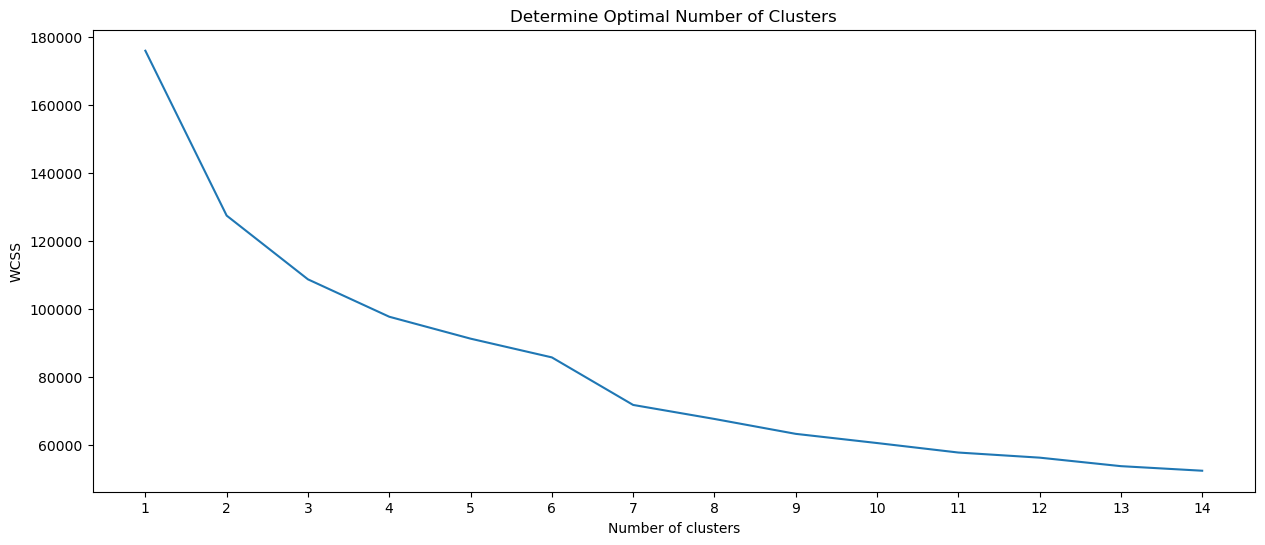

In [224]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42,max_iter=33)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,6))
plt.plot(range(1, 15, 1), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Determine Optimal Number of Clusters')
plt.xticks(range(1, 15, 1))  # Setting the x-ticks at every integer value from 1 to 29

plt.show()


In [46]:
def findIterations(X_scaled, clusters=6, tol=1e-4, max=1000):
    '''
    To determine the optimal number of iterations in a Kmeans, we need to find the change in inertia between iterations
    When the change is minimal, we can stop the iterations and get the optimal number

    Parameters- 
    1. X_Scaled= Standardized features 
    2.clusters= number of clusters can be found using elbow method and hardcoded 
    3.tol= Tolerance of convergence 
    4. max= maximum number of iterations to be performed until change in inertia is less than tol

    Returns-
    1. i=Return the optimal number of iterations
    2. max= if optimal iteration is not found within max iteration, returns max iteration
    '''
    prevInertia = None
    for i in range(1, max + 1):
        kmeans = KMeans(n_clusters=clusters, max_iter=i, tol=tol, random_state=42)
        kmeans.fit(X_scaled)
        inertia = kmeans.inertia_ #Calculates the inertia-> sum of squared distances to the closest cluster center

        #checking tolerance now, if previous change-current change is less than tolerance allowed, then the fuction will return 'i' that is the number of iterations
        if prevInertia is not None and abs(prevInertia - inertia)<tol:
            return i
        prevInertia = inertia 
    return max

In [48]:
def cluster(selectedIndexes,totalRecc,countClusters=6, iterations=findIterations(X_scaled)):
    '''
    This function performs K means clustering on X_scaled dataset.The cluster number is then retrieved from the selected indexes.
    The songs are then selected in the same proportion as the selected tracks' clusters and are the rows are then concatenated with recommnedSongs dataframe

    Parameters-
    1. selectedIndexes= the user selects a list of indexes of their favorite songs
    2. totalRecc= the number of songs to be recommneded
    3. countClusters= number of clusters, hardcoded
    4. iterations= number of iterations for kmeans, is determined with findIterations() function

    Returns-
    1. recommendedSongs= returns recommended songs
    
    '''
    kmeans=KMeans(n_clusters=countClusters, random_state=42, max_iter=iterations)
    df['Cluster']=kmeans.fit_predict(X_scaled)
    
    #Getting the values of cluster
    val=[df.loc[index, 'Cluster'] for index in selectedIndexes]
    
    #Distribution of cluster values in variable val
    valDist=Counter(val)
    totalSelected = len(selectedIndexes)
    # Create an empty DataFrame to store recommended songs
    recommendedSongs=pd.DataFrame()
    # Sample the same distribution of clusters from the DataFrame
    for cluster, count in valDist.items():
        proportion = count / totalSelected
        numRecc = int(proportion * totalRecc)
        
        #Filtering songs from the common cluster that are not in the user's selection
        clusterSongs = df[(df['Cluster'] == cluster) & (~df.index.isin(selectedIndexes))]
        
        #sample songs based on the proportion
        sampled= clusterSongs.sample(n=numRecc, replace=True, random_state=42)
        
        # Append the sampled songs to the recommended songs DataFrame
        recommendedSongs=pd.concat([recommendedSongs, sampled])
    
    return recommendedSongs

In [60]:
songsRecc=cluster(selectedIndexes,30)

In [6]:
#songsRecc.to_csv('new1_tcc_ceds_music.csv',index=False)

In [5]:
##you can keep the same recommended dataset by directly downloading it or using the drive link OR you can create your own recommended track dataframe
songsRecc=pd.read_csv('new1_tcc_ceds_music.csv')
#try:
    #Read the file through drive
#    orig_url = "https://drive.google.com/file/d/1Q-TYkeNHt_LCmpNYAb5dQTl_99_84wNy/view?usp=drive_link"
    #this is to remove all the directory information and only extract the alpha numerical file identifier of the code
#    file_id = orig_url.split('/')[-2]
    #this is to add the "export syntax to the alpha numierical file_id
#    dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
    #turn this object into a raw string
#    url = requests.get(dwn_url).text
#    csv_raw = StringIO(url)
    #use panda to load the raw csv string
#    songsRecc= pd.read_csv(csv_raw)
#except e:
#    print(e)

In [285]:
songsRecc.shape

(30, 31)

### Lets begin exploring the recommendations
I have already displayed the columns, but I think it needs more explanation
I divided the columns into three different parts logically-
>Thematic <br>Emotional <br>Sentimental

##### There are the following thematic columns-
1. artist_name
2. track_name
3. release_date
4. genre
5. lyrics
6. len
7. topic
8. age

The names are pretty obvious and define what data will be in the columns

Emotional columns include the categorical aspects
##### Emotional columns-
1. Romantic
2. Sadness
3. Feelings
4. Like/girls
5. Family/spiritual
6. night/time
7. dating
8. world/life
9. violence
10. shake the audience
11. communication
12. obscene
13. music
14. movement/places
15. light/visual presentation
These are also self defining.

##### Here are the sentimental columns-
sentimental columns capture the dimensions of the music
1. Danceability
2. Loudness
3. Acousticness
4. Instrumentalness
5. Valence
6. Energy

Here's the details-

##### Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

##### Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). A value of 0.0 is the least loud and 1.0 is very loud.

##### Acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

##### Instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

##### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

##### Energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [237]:
songsRecc.head()

artist_name                           track_name  \
5920               taylor swift                             superman   
28167              busta rhymes        the whole world looking at me   
27966                      epmd                          gold digger   
27927  lords of the underground                              tic toc   
22769                 alborosie  can't stand it (feat. dennis brown)   

       release_date    genre  \
5920           2010      pop   
28167          2018  hip hop   
27966          2015  hip hop   
27927          2015  hip hop   
22769          2010   reggae   

                                                  lyrics  len    dating  \
5920   tall dark superman put paper briefcase drive a...  116  0.038726   
28167  world lookin watchin waitin fullfill destiny w...   52  0.002105   
27966  sermon heck marry name deal sweat hmmm surpris...   94  0.017893   
27927  throw hand block throw hand stop stop brothers...   74  0.001074   
22769  things respect life psyco maccaronian echo pup...  180  0.000526   

       violence  world/life  night/time  shake the audience  family/gospel  \
5920   0.077457    0.252944    0.030618            0.011751       0.000521   
28167  0.002105    0.205729    0.002105            0.002105       0.002105   
27966  0.000849    0.000849    0.000849            0.000849       0.000849   
27927  0.001074    0.001074    0.001074            0.001074       0.001074   
22769  0.384329    0.000526    0.059579            0.000526       0.000526   

       romantic  communication   obscene     music  movement/places  \
5920   0.029667       0.036142  0.048428  0.000521         0.052041   
28167  0.002105       0.002105  0.677996  0.002105         0.002105   
27966  0.046369       0.000849  0.552213  0.000849         0.291434   
27927  0.073582       0.001074  0.571716  0.001074         0.001074   
22769  0.000526       0.313604  0.000526  0.038707         0.132300   

       light/visual perceptions  family/spiritual  like/girls   sadness  \
5920                   0.000521          0.022905    0.076293  0.319380   
28167                  0.002105          0.002105    0.002105  0.002105   
27966                  0.000849          0.000849    0.000849  0.042062   
27927                  0.001074          0.037721    0.001074  0.169204   
22769                  0.012602          0.000526    0.000526  0.000526   

       feelings  danceability  loudness  acousticness  instrumentalness  \
5920   0.000521      0.563522  0.820680      0.026907          0.000002   
28167  0.002105      0.786635  0.717124      0.021184          0.000002   
27966  0.000849      0.679411  0.764967      0.013654          0.000814   
27927  0.001074      0.829958  0.693562      0.084638          0.000003   
22769  0.000526      0.612260  0.746250      0.023794          0.000016   

        valence    energy     topic       age  Cluster  
5920   0.551731  0.765758   sadness  0.142857        5  
28167  0.720734  0.784778   obscene  0.028571        5  
27966  0.578524  0.829825   obscene  0.071429        5  
27927  0.432193  0.566553   obscene  0.071429        5  
22769  0.441467  0.673663  violence  0.142857        5

In [239]:
print(songsRecc['artist_name'].value_counts())

artist_name
taylor swift                1
busta rhymes                1
kansas                      1
native construct            1
boston                      1
u2                          1
skillet                     1
pavement                    1
the rolling stones          1
queen                       1
arcade fire                 1
john michael montgomery     1
kelly clarkson              1
buddy guy                   1
randy rogers band           1
the kooks                   1
the oak ridge boys          1
patty loveless              1
brooks & dunn               1
dean lewis                  1
imagine dragons             1
soja                        1
korn                        1
vince staples               1
aventura                    1
proleter                    1
alborosie                   1
lords of the underground    1
epmd                        1
the fall                    1
Name: count, dtype: int64


#### % of topics in the recommended data

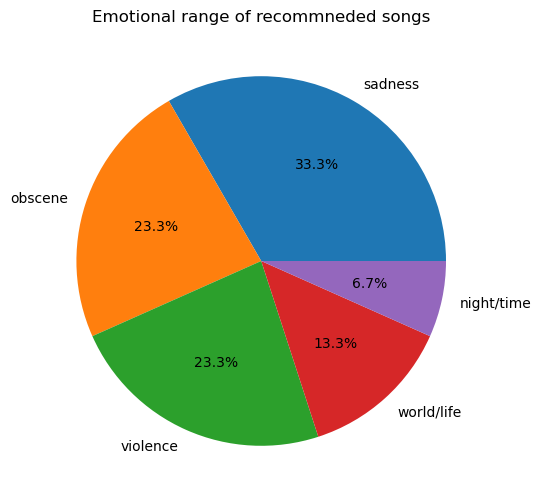

In [241]:
topic=songsRecc['topic'].value_counts()
topic.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.ylabel('')
plt.title(f'Emotional range of recommneded songs')
plt.show()

#### Count of genre and topic

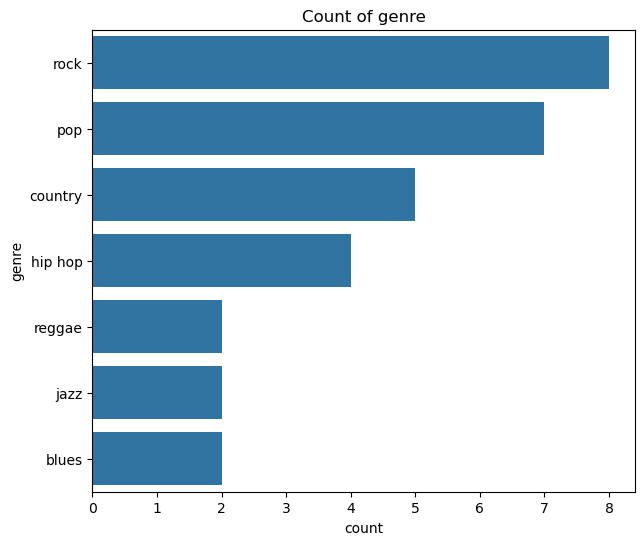

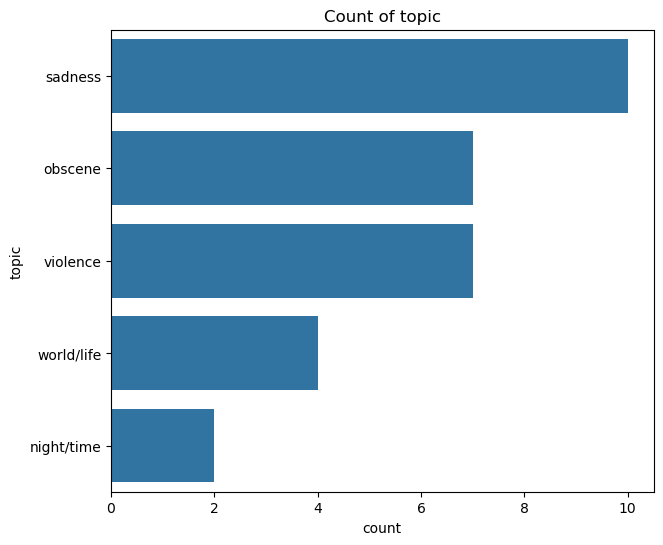

In [243]:
cols= ['genre', 'topic']

for column in cols:
    plt.figure(figsize=(7, 6))
    sns.countplot(y=column, data=songsRecc, order=songsRecc[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.show()


#### Distribution of release dates

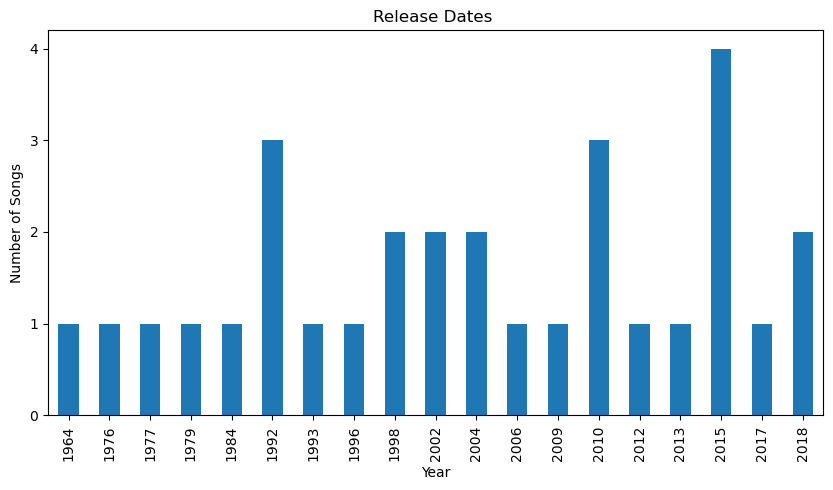

In [244]:
songsRecc['release_date'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title(f'Release Dates ')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.yticks([i for i in range(5)])
plt.show()

#### Distribution of sentimental features

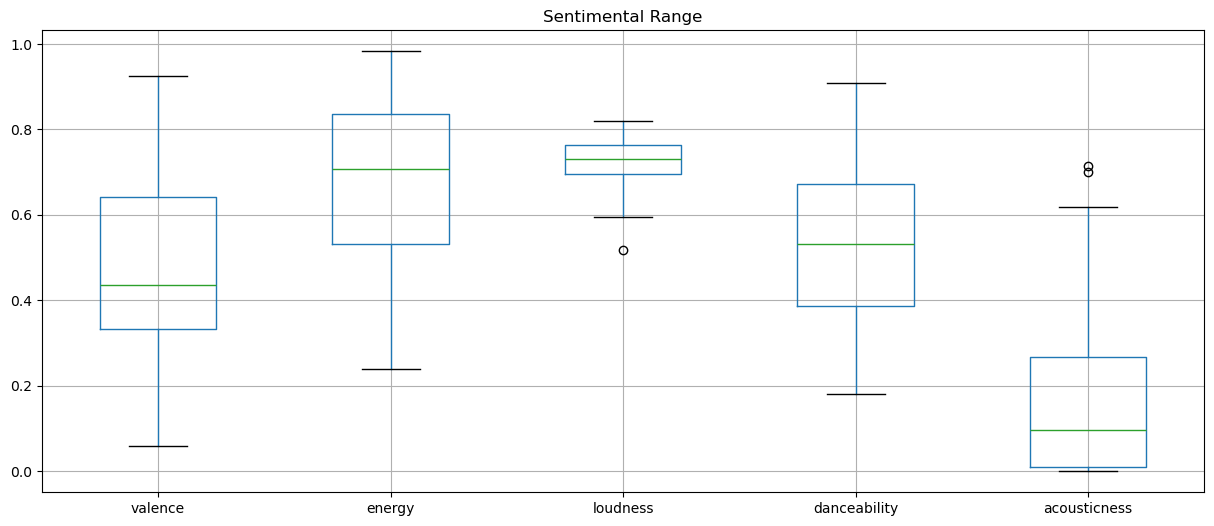

In [247]:
songsRecc.boxplot(column=['valence', 'energy', 'loudness','danceability','acousticness'],figsize=(15,6))
plt.title(f'Sentimental Range')
plt.show()

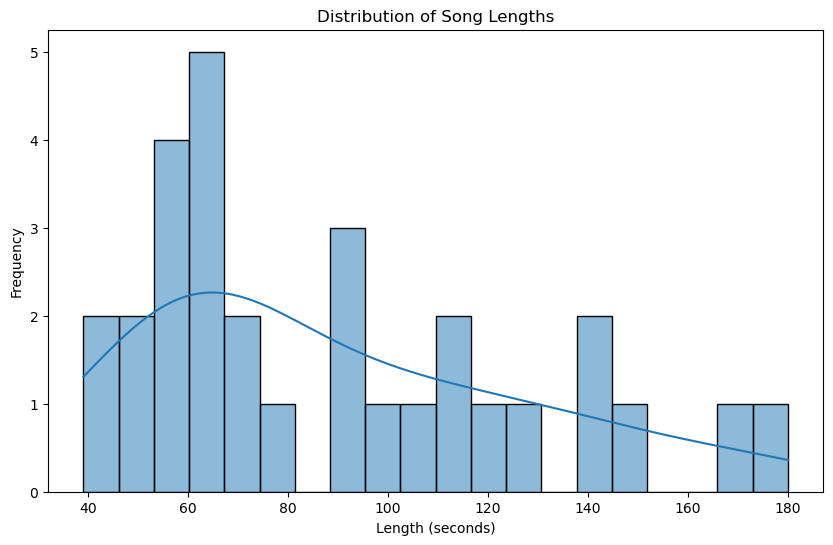

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(songsRecc['len'], bins=20, kde=True)
plt.title('Distribution of Song Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Frequency')
plt.show()


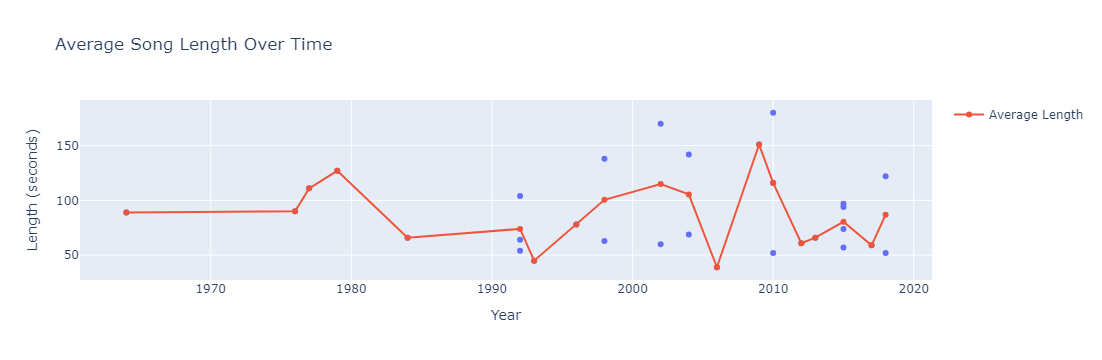

In [13]:

#creating a scatter plot with hover data
fig = px.scatter(songsRecc, x='release_date', y='len', 
                 hover_data={'track_name': True, 'release_date': False, 'len': False},
                 title='Average Song Length Over Time')

#Creating a line plot for the average song length
yrLengthMean = songsRecc.groupby('release_date')['len'].mean().reset_index()
fig.add_scatter(x=yrLengthMean['release_date'], y=yrLengthMean['len'], mode='lines+markers', name='Average Length')

#Making changes to the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Length (seconds)',
    showlegend=True
)

# Show the plot
fig.show()


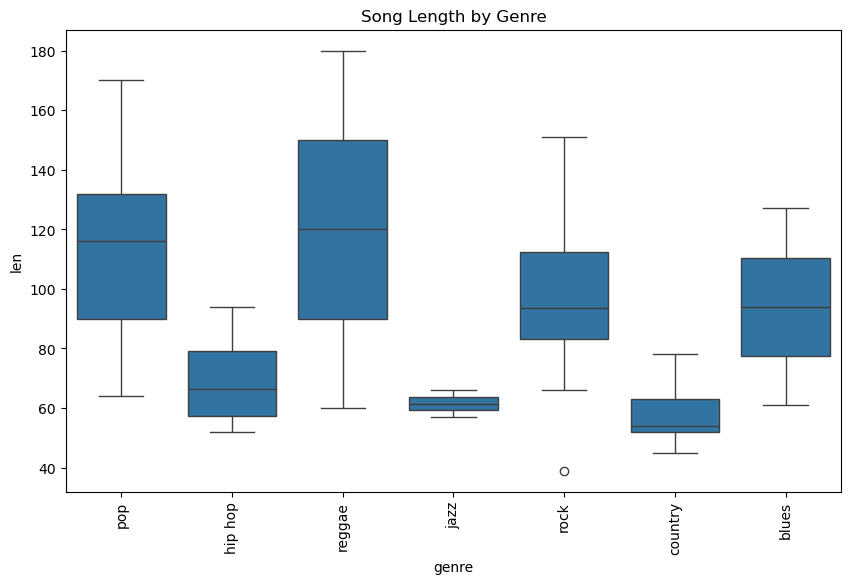

In [251]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='len', data=songsRecc)
plt.title('Song Length by Genre')
plt.xticks(rotation=90)
plt.show()


In [19]:
#filtering inappropriate words for the word cloud

try:
    orig_url = "https://drive.google.com/file/d/13HSFoy_rrl8uprLZZiiIIGMlsXvmr0dI/view?usp=sharing"
    file_id = orig_url.split('/')[-2]
    dwn_url = f'https://drive.google.com/uc?export=download&id={file_id}'
    response = requests.get(dwn_url)
    response.raise_for_status()
    text_data = response.text
    banned_words = text_data.split('\n')
    print("File successfully loaded into list")
except Exception as e:
    print(f"An error occurred: {e}")


File successfully loaded into list


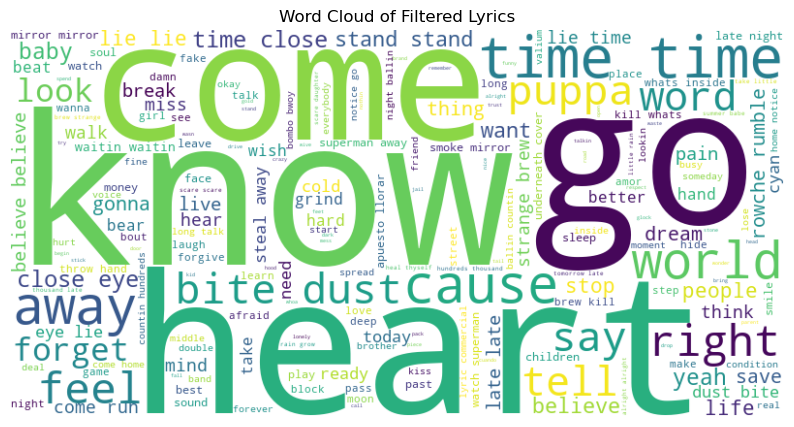

In [20]:
# Combine all lyrics into one text
lyrics = ' '.join(songsRecc['lyrics'])
# Filter out banned words
filteredLyrics = [word for word in lyrics.split() if word.lower() not in banned_words]
# Join the filtered words back into a single string
filtered_lyrics_text = ' '.join(filteredLyrics)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_lyrics_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Lyrics')
plt.show()


References used-

1. <a href='https://medium.com/@joerosborne/intro-to-web-scraping-build-your-first-scraper-in-5-minutes-1c36b5c4b110'> Web Scraping</href><br>
2. <a href='https://www.discogs.com/developers?srsltid=AfmBOopirGvEV8TtojH0DQfr-0ODzpNzy6hSbR5UaDCzngpekGZfJ1sg'> Discog API docs </href> <br>
3. <a href='https://www.datacamp.com/cheat-sheet/regular-expresso'> Regex cheat sheet</href> <br>
4. <a href='https://www.geeksforgeeks.org/k-means-clustering-introduction/'> Intro to kMeans</href><br>
5. <a href='https://www.youtube.com/watch?v=_aWzGGNrcic'> Kmeans Clustering  by Victor Lavrenko</href><br>
6. <a href='https://www.youtube.com/watch?v=FqIGui0rwh4'>Elbow method</href><br>
7. <a href='https://github.com/plotly/plotly.py'></href>Plotly Documentation<br>
8. <a href='https://github.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words/blob/master/en'>List of inappropriate words</href><br>
9. <a href='https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b'></href>Creating word cloud<br>